In [206]:
def Clean_empty(path):
    """
    Iterate through all subfolders and subfiles under a file, cleaning up empty folders and files
    path:file path
    """
    
    for (dirpath,dirnames,filenames) in os.walk(path):
        for filename in filenames:
            file_folder=dirpath+'/'+filename
            # print(file_folder)
            if os.path.isdir(file_folder): 
                if not os.listdir(file_folder): 
                    print(file_folder)
                    # os.rmdir(dirpath+filename) 
            elif os.path.isfile(file_folder): 
                if os.path.getsize(file_folder) == 0: 
                    print(file_folder)
                    os.remove(file_folder)  
    print(path, 'clean over!')

if __name__ == "__main__": 
    path = '/home/chavez/Desktop/Software/Projects/BugDiversity/ml/images'
    Clean_empty(path)

/home/chavez/Desktop/Software/Projects/BugDiversity/ml/images clean over!


In [1]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt


2021-10-24 01:48:46.082003: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-24 01:48:46.082017: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [208]:
image_path = pathlib.Path("/home/chavez/Desktop/Software/Projects/BugDiversity/ml/images")

data = DataLoader.from_folder(image_path)


INFO:tensorflow:Load image with size: 20823, num_label: 1045, labels: (Eastern)_black_carpenter_ant, (Immigrant)_Pavement_Ant, Abbott's_Sphinx, Achemon_Sphinx, Acorn_Moth, Adjutant_Wainscot, Admirable_Grasshopper, Agreeable_Tiger_Moth, Ailanthus_Webworm_Moth, Alder_Spittlebug, Alfalfa_Looper_Moth, Alfalfa_Plant_Bug, Alfalfa_Webworm, Ambiguous_Moth, American_Angle_Shades, American_Bird_Grasshopper, American_Bumble_Bee, American_Carrion_Beetle, American_Copper, American_Dagger_Moth, American_Dog_Tick, American_Dun-bar_Moth, American_Emerald, American_Idia, American_Lady, American_Lappet_Moth, American_Rubyspot, American_Snout, American_Wax_Moth, Anchor_Stink_Bug, Angulose_Prominent, Anise_Swallowtail, Arabesque_Orbweaver, Arched_Hooktip, Arcigera_Flower_Moth, Argus_Tortoise_Beetle, Armyworm_Moth, Arrowhead_Spider, Arrowshaped_Micrathena, Ashy_Gray_Lady_Beetle, Asian_Lady_Beetle, Asiatic_Oak_Weevil, Assembly_Moth, Autumn_Meadowhawk, Azalea_Sphinx, Azure_Bluet, Bald-faced_Hornet, Baltimore

INFO:tensorflow:Load image with size: 20823, num_label: 1045, labels: (Eastern)_black_carpenter_ant, (Immigrant)_Pavement_Ant, Abbott's_Sphinx, Achemon_Sphinx, Acorn_Moth, Adjutant_Wainscot, Admirable_Grasshopper, Agreeable_Tiger_Moth, Ailanthus_Webworm_Moth, Alder_Spittlebug, Alfalfa_Looper_Moth, Alfalfa_Plant_Bug, Alfalfa_Webworm, Ambiguous_Moth, American_Angle_Shades, American_Bird_Grasshopper, American_Bumble_Bee, American_Carrion_Beetle, American_Copper, American_Dagger_Moth, American_Dog_Tick, American_Dun-bar_Moth, American_Emerald, American_Idia, American_Lady, American_Lappet_Moth, American_Rubyspot, American_Snout, American_Wax_Moth, Anchor_Stink_Bug, Angulose_Prominent, Anise_Swallowtail, Arabesque_Orbweaver, Arched_Hooktip, Arcigera_Flower_Moth, Argus_Tortoise_Beetle, Armyworm_Moth, Arrowhead_Spider, Arrowshaped_Micrathena, Ashy_Gray_Lady_Beetle, Asian_Lady_Beetle, Asiatic_Oak_Weevil, Assembly_Moth, Autumn_Meadowhawk, Azalea_Sphinx, Azure_Bluet, Bald-faced_Hornet, Baltimore

In [209]:
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)




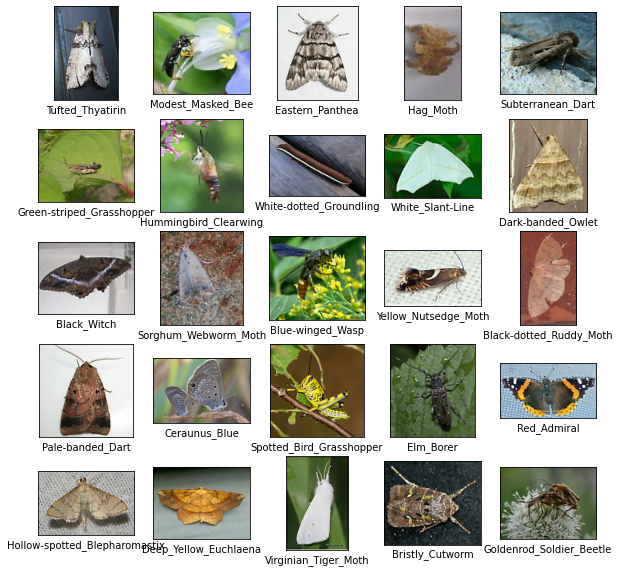

In [210]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()


In [211]:
model = image_classifier.create(train_data, validation_data=validation_data, epochs = 8, batch_size=32)


INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_3 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 1045)              1338645   
Total params: 4,751,669
Trainable params: 1,338,645
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/8
520/520 [==============================] - 224s 428ms/step - loss: 6.8909 - accuracy: 0.0130 - val_loss: 6.5651 - val_accuracy: 0.0303
Epoch 2/8
520/520 [==============================] - 225s 434ms/step - loss: 6.1340 - accuracy: 0.1023 - val_loss: 6.0861 - val_accuracy: 0.0875
Epoch 3/8
520/520 [==============================] - 226s 435ms/step -

In [212]:
loss, accuracy = model.evaluate(test_data)


66/66 [==============================] - 28s 366ms/step - loss: 4.7072 - accuracy: 0.2775


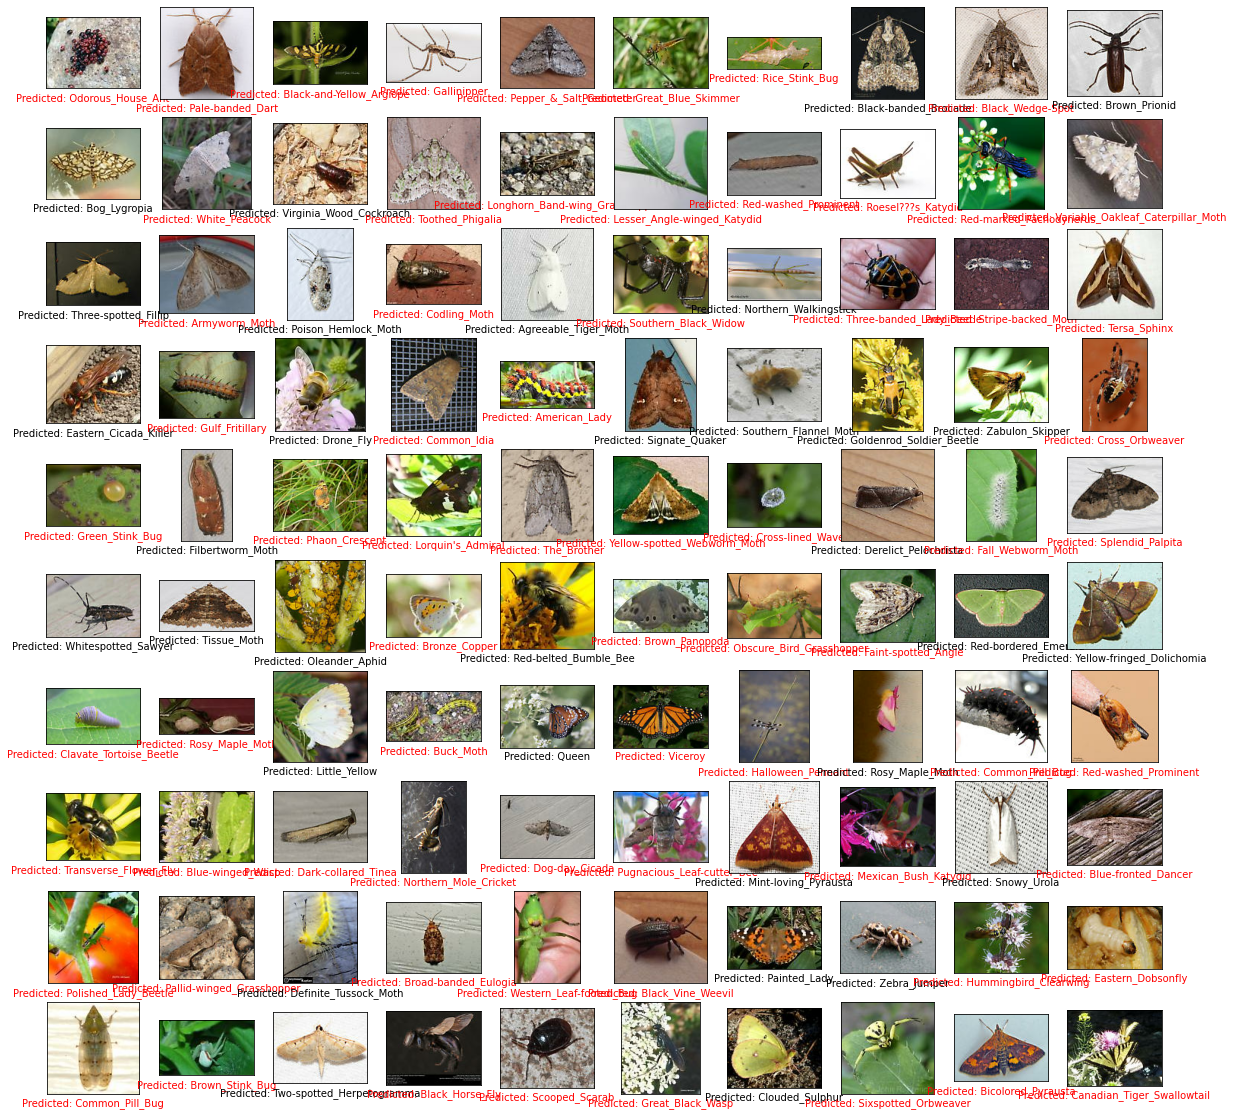

In [213]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()


In [214]:
model.export(export_dir='.')


2021-10-23 23:07:03.993532: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmp/tmpmtgyotuj/assets


INFO:tensorflow:Assets written to: /tmp/tmpmtgyotuj/assets
2021-10-23 23:07:06.126651: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2021-10-23 23:07:06.127415: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2021-10-23 23:07:06.158902: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:1137] Optimization results for grappler item: graph_to_optimize
  function_optimizer: Graph size after: 913 nodes (656), 923 edges (664), time = 13.462ms.
  function_optimizer: function_optimizer did nothing. time = 0.273ms.

2021-10-23 23:07:06.715279: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:351] Ignored output_format.
2021-10-23 23:07:06.715316: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:354] Ignored drop_control_dependency.
2021-10-23 23:07:06.766084: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:210] disabling MLIR crash reprodu

INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpkn3xr6wq/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpkn3xr6wq/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


In [3]:
model.export(export_dir='.', export_format=ExportFormat.LABEL)


NameError: name 'model' is not defined

In [5]:

model = TensorflowLiteClassificationModel("/home/chavez/Desktop/Software/Projects/BugDiversity/flutter_application_1/assets/")

NameError: name 'TensorflowLiteClassificationModel' is not defined

In [8]:
model.evaluate_tflite('model.tflite', test_data)


NameError: name 'model' is not defined

In [2]:
import tensorflow as tf
from tensorflow import keras
import os

base_dir = './images'

2021-10-24 04:33:29.385692: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-10-24 04:33:29.385708: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:


IMAGE_SIZE = 224
BATCH_SIZE = 32

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
    subset='training'
)
val_generator = datagen.flow_from_directory(  #validation generator
    base_dir, 
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)



Found 13737 images belonging to 859 classes.
Found 3366 images belonging to 859 classes.


In [4]:
print(train_generator.class_indices)
labels = '\n'.join(sorted(train_generator.class_indices.keys()))
with open('labels.txt', 'w') as f:
    f.write(labels)

{'(Immigrant)_Pavement_Ant': 0, "Abbott's_Sphinx": 1, 'Achemon_Sphinx': 2, 'Acorn_Moth': 3, 'Adjutant_Wainscot': 4, 'Admirable_Grasshopper': 5, 'Agreeable_Tiger_Moth': 6, 'Ailanthus_Webworm_Moth': 7, 'Alder_Spittlebug': 8, 'Alfalfa_Looper_Moth': 9, 'Alfalfa_Plant_Bug': 10, 'Alfalfa_Webworm': 11, 'Ambiguous_Moth': 12, 'American_Angle_Shades': 13, 'American_Bird_Grasshopper': 14, 'American_Bumble_Bee': 15, 'American_Carrion_Beetle': 16, 'American_Copper': 17, 'American_Dagger_Moth': 18, 'American_Dog_Tick': 19, 'American_Dun-bar_Moth': 20, 'American_Emerald': 21, 'American_Idia': 22, 'American_Lady': 23, 'American_Lappet_Moth': 24, 'American_Rubyspot': 25, 'American_Snout': 26, 'American_Wax_Moth': 27, 'Anchor_Stink_Bug': 28, 'Angulose_Prominent': 29, 'Anise_Swallowtail': 30, 'Arabesque_Orbweaver': 31, 'Arched_Hooktip': 32, 'Arcigera_Flower_Moth': 33, 'Argus_Tortoise_Beetle': 34, 'Armyworm_Moth': 35, 'Arrowhead_Spider': 36, 'Arrowshaped_Micrathena': 37, 'Ashy_Gray_Lady_Beetle': 38, 'Asia

In [5]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3) 
base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SHAPE,
    include_top=False,
    weights='imagenet'
)

2021-10-24 04:33:37.062489: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-10-24 04:33:37.062511: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-24 04:33:37.062525: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (chavez-VivoBook-ASUSLaptop-X421EQ-S433EQ): /proc/driver/nvidia/version does not exist
2021-10-24 04:33:37.062660: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:


base_model.trainable=False
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(32,3, activation = 'relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(859, #no.of classes
                        activation='softmax')
])



In [7]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [8]:
epochs = 10
history = model.fit(
    train_generator, 
    epochs = epochs, 
    validation_data=val_generator
)



2021-10-24 04:33:42.113624: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
430/430 [==============================] - 248s 573ms/step - loss: 6.7173 - accuracy: 0.0016 - val_loss: 6.6354 - val_accuracy: 0.0039
Epoch 2/10
430/430 [==============================] - 245s 569ms/step - loss: 6.3720 - accuracy: 0.0063 - val_loss: 6.1858 - val_accuracy: 0.0095
Epoch 3/10
430/430 [==============================] - 198s 460ms/step - loss: 5.8461 - accuracy: 0.0166 - val_loss: 5.9047 - val_accuracy: 0.0149
Epoch 4/10
430/430 [==============================] - 208s 484ms/step - loss: 5.4330 - accuracy: 0.0322 - val_loss: 5.6795 - val_accuracy: 0.0321
Epoch 5/10
430/430 [==============================] - 220s 511ms/step - loss: 5.0886 - accuracy: 0.0483 - val_loss: 5.5294 - val_accuracy: 0.0389
Epoch 6/10
430/430 [==============================] - 221s 514ms/step - loss: 4.8120 - accuracy: 0.0641 - val_loss: 5.4382 - val_accuracy: 0.0377
Epoch 7/10
430/430 [==============================] - 221s 514ms/step - loss: 4.6000 - accuracy: 0.0828 - val_loss: 5.4163 -

In [9]:

keras_file = 'predict.h5'
keras.models.save_model(model, keras_file)



/home/chavez/anaconda3/envs/shutterbug/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [16]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)


In [17]:
tflite_model = converter.convert()

open('model.tflite', 'wb').write(tflite_model)

2021-10-24 05:20:47.800999: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmp/tmpoo0ffcez/assets


INFO:tensorflow:Assets written to: /tmp/tmpoo0ffcez/assets
/home/chavez/anaconda3/envs/shutterbug/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
2021-10-24 05:20:55.417492: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2021-10-24 05:20:55.417604: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2021-10-24 05:20:55.432339: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:1137] Optimization results for grappler item: graph_to_optimize
  function_optimizer: function_optimizer did nothing. time = 0.015ms.
  function_optimizer: function_optimizer did nothing. time = 0.001ms.

2021-10-24 05:20:55.901631: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:351] Ig

10456832